<a href="https://colab.research.google.com/github/YasaswiniReddy07/YasaswiniReddy07/blob/main/Project_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project – Heart Disease**

Tasks To Be Performed:
1. Data Analysis:

  a. Import the dataset

  b. Get information about the dataset (mean, max, min, quartiles etc.)

  c. Find the correlation between all fields
2. Data Visualization:

  a. Visualize the number of patients having a heart disease and not having
a heart disease

  b. Visualize the age and whether a patient has disease or not

  c. Visualize correlation between all features using a heat map
3. Logistic Regression:

  a. Build a simple logistic regression model:

  i. Divide the dataset in 70:30 ratio

  ii. Build the model on train set and predict the values on test set

  iii. Build the confusion matrix and get the accuracy score

4. Decision Tree:

  a. Build a decision tree model:

  i. Divide the dataset in 70:30 ratio

  ii. Build the model on train set and predict the values on test set

  iii. Build the confusion matrix and calculate the accuracy

  iv. Visualize the decision tree using the Graphviz package

5. Random Forest:

  a. Build a Random Forest model:

  i. Divide the dataset in 70:30 ratio

  ii. Build the model on train set and predict the values on test set

  iii. Build the confusion matrix and calculate the accuracy

  iv. Visualize the model using the Graphviz package

6. Select the best model

  a. Print the confusion matrix of all classifiers

  b. Print the classification report of all classifiers

  c. Calculate Recall Precision and F1 score of all the models

  d. Visualize confusion matrix using heatmaps

  e. Select the best model based on the best accuracies


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
correlation_matrix = df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

<ipython-input-13-489d1e48240a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


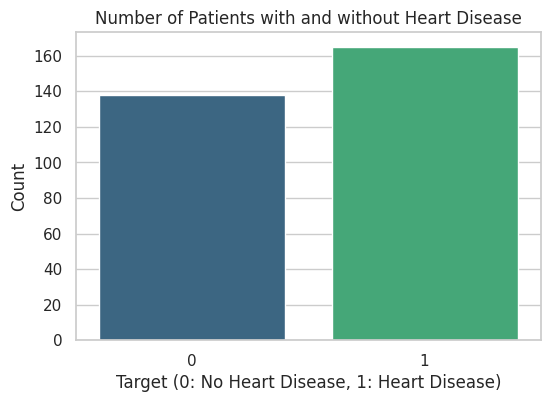

In [ ]:
# Visualize the number of patients having a heart disease and not having a heart disease
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

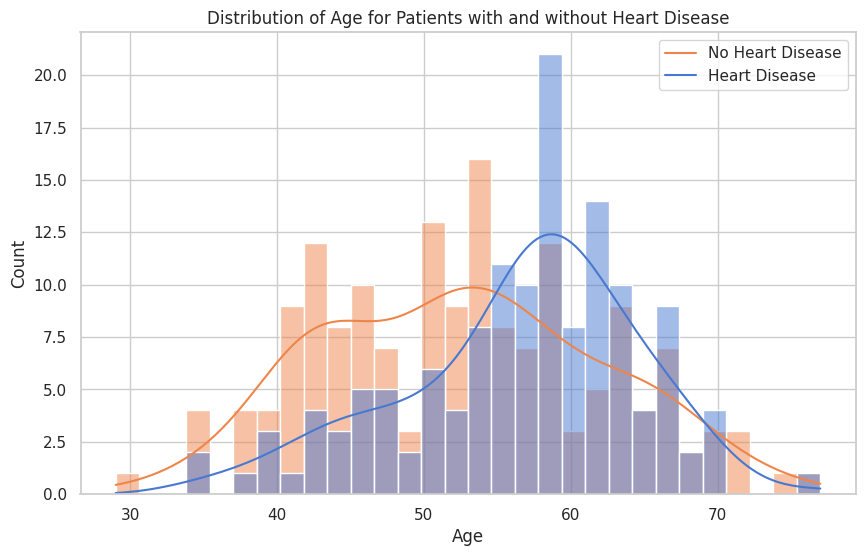

In [ ]:
# Visualize the age and whether a patient has disease or not
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='target', data=df, bins=30, kde=True, palette='muted')
plt.title('Distribution of Age for Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

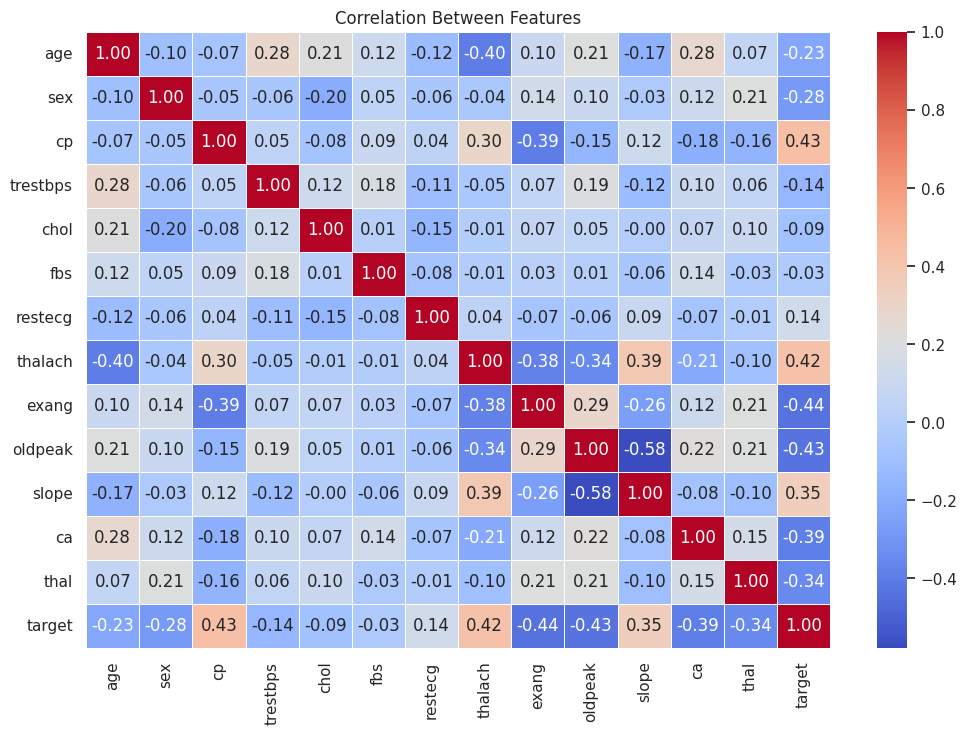

In [ ]:
# Visualize correlation between all features using a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[32  9]
 [ 8 42]]


In [ ]:
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.8131868131868132


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dc = DecisionTreeClassifier(random_state=42)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[32  9]
 [15 35]]


In [ ]:
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.7362637362637363


In [ ]:
# Visualize the decision tree using Graphviz
dot_data = export_graphviz(dc, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("heart_disease_decision_tree", cleanup=True)
graph.view("heart_disease_decision_tree")

'heart_disease_decision_tree.png'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rc = RandomForestClassifier(random_state=42)
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[33  8]
 [ 8 42]]


In [ ]:
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.8241758241758241


In [ ]:
# Visualize the decision tree from the Random Forest using Graphviz
dot_data_rf = export_graphviz(rc.estimators_[0], out_file=None,
                              feature_names=X.columns,
                              class_names=['No Heart Disease', 'Heart Disease'],
                              filled=True, rounded=True, special_characters=True)

graph_rf = graphviz.Source(dot_data_rf, format="png")
graph_rf.render("heart_disease_random_forest_tree", cleanup=True)
graph_rf.view("heart_disease_random_forest_tree")


'heart_disease_random_forest_tree.png'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
models = [lr, dc, rc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [ ]:
metrics_dict = {'Model': [], 'Confusion Matrix': [], 'Classification Report': [], 'Recall': [], 'Precision': [], 'F1 Score': []}

In [ ]:
def calculate_metrics(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

    # Calculate Recall, Precision, and F1 Score
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Append metrics to the dictionary
    metrics_dict['Model'].append(name)
    metrics_dict['Confusion Matrix'].append(conf_matrix)
    metrics_dict['Classification Report'].append(class_report)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1 Score'].append(f1_score)

    # Visualize confusion matrix using heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

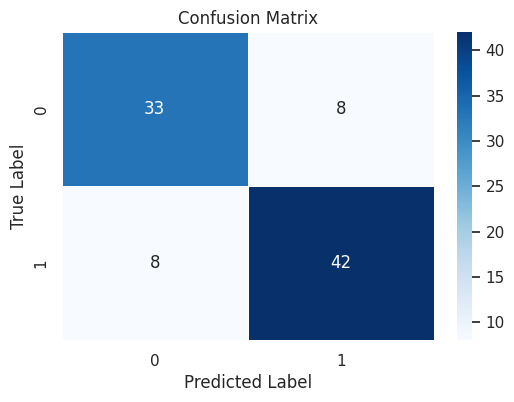

In [ ]:
 # Visualize confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

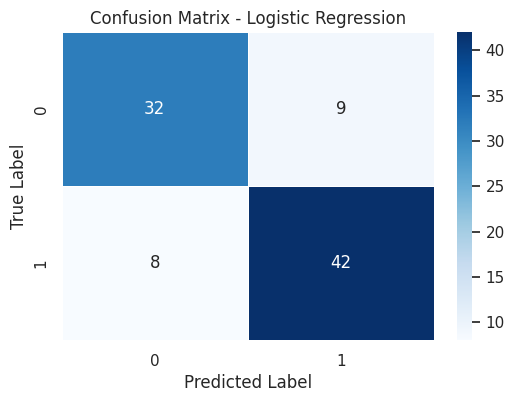

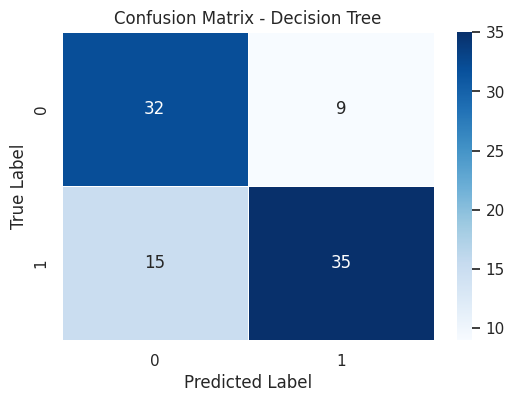

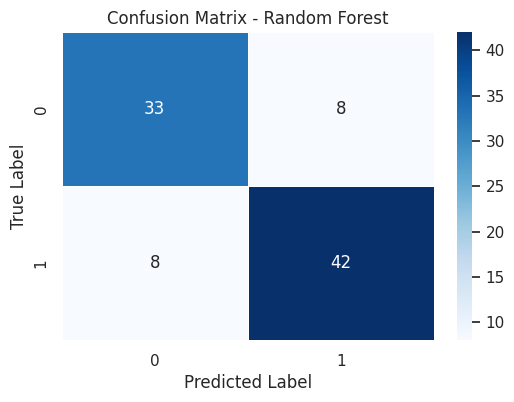

In [ ]:
for model, name in zip(models, model_names):
    calculate_metrics(model, name, X_test, y_test)

In [ ]:
metrics_df = pd.DataFrame(metrics_dict)
print("\nMetrics for all classifiers:")
print(metrics_df)


Metrics for all classifiers:
                 Model     Confusion Matrix  \
0  Logistic Regression   [[32, 9], [8, 42]]   
1        Decision Tree  [[32, 9], [15, 35]]   
2        Random Forest   [[33, 8], [8, 42]]   

                               Classification Report  Recall  Precision  \
0                    precision    recall  f1-scor...    0.84   0.823529   
1                    precision    recall  f1-scor...    0.70   0.795455   
2                    precision    recall  f1-scor...    0.84   0.840000   

   F1 Score  
0  0.831683  
1  0.744681  
2  0.840000  


In [ ]:
best_model_name = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Model']
print(f"\nBest Model based on F1 Score: {best_model_name}")


Best Model based on F1 Score: Random Forest
